In [1]:
import pandas as pd
import numpy as np
df = pd.read_json('./glassdoor.json')
df.drop(labels=['field1'],axis=1,inplace=True)

In [2]:
df=df[~df['jobDesc'].duplicated()]
df

role    location   
0      Junior Software Developer- TietoEVRY    Karlstad  \
1              Software Developer .NET (C#)  Gothenburg   
2                 Junior Back-end Developer   Stockholm   
3                Android Software Developer  Gothenburg   
4                  Senior Backend Developer       Malmö   
..                                      ...         ...   
112                      Software Developer  Copenhagen   
113              Student Software developer  Copenhagen   
114           Healthcare Business Developer  Copenhagen   
115  Praktik, Software Developer, København  Copenhagen   
116               Web Site Developer Intern     Denmark   

                                               jobDesc  
0    have a degree in Computer science or closely r...  
1    Interested in working in a smaller company whe...  
2    \nWork with the senior back-end developers to ...  
3    \nDevelopment of high quality, scalable and ma...  
4    \nAbility to help shape and influence the succ...  
..                                                 ...  
112  \nWork professionally to ensure code quality t...  
113  Skip to content\nBASE / Open positions / Stude...  
114  \nMarket Research: Conduct surveys and intervi...  
115  \n20 ugers lønnet praktik normeret til 37 time...  
116  Visiple is a game changer in the video confere...  

[116 rows x 3 columns]

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

s = "I saw two mice today!"

print(" ".join([token.lemma_ for token in nlp(s)]))

I see two mouse today !


In [4]:
import re
import pandas as pd
from nltk.tokenize import TweetTokenizer

from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

import spacy
nlp = spacy.load('en_core_web_sm')


def remove_stopwords(text) -> str:
    """ Remove stopwords from text """
    filtered_words = [word for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)


def lemmatize(sentence: str) -> str:
    """ Convert all words in sentence to lemmatized form """
    return " ".join([token.lemma_ for token in nlp(sentence)])


def text_clean(s_text: str) -> str:
    """ Text clean """
    try:
        output = re.sub("[^a-zA-Z]+", " ", s_text)  # Filter
        output = re.sub(r"\s+", " ", output)  # Remove multiple spaces
        output = remove_stopwords(output)  # Remove stopwords
        output = output.strip('\'"')  # Remove leading and trailing ' or "
        return output.lower().strip()
    except:
        return ""

def text_len(s_text: str) -> int:
    """ Length of the text """
    return len(s_text)

df['jobDesc_clean'] = df['jobDesc'].map(text_clean)

df['jobDesc_len'] = df['jobDesc_clean'].map(text_len)
#df = df[df['jobDesc_len'] > 32]

display(df)

role    location   
0      Junior Software Developer- TietoEVRY    Karlstad  \
1              Software Developer .NET (C#)  Gothenburg   
2                 Junior Back-end Developer   Stockholm   
3                Android Software Developer  Gothenburg   
4                  Senior Backend Developer       Malmö   
..                                      ...         ...   
112                      Software Developer  Copenhagen   
113              Student Software developer  Copenhagen   
114           Healthcare Business Developer  Copenhagen   
115  Praktik, Software Developer, København  Copenhagen   
116               Web Site Developer Intern     Denmark   

                                               jobDesc   
0    have a degree in Computer science or closely r...  \
1    Interested in working in a smaller company whe...   
2    \nWork with the senior back-end developers to ...   
3    \nDevelopment of high quality, scalable and ma...   
4    \nAbility to help shape and influence the succ...   
..                                                 ...   
112  \nWork professionally to ensure code quality t...   
113  Skip to content\nBASE / Open positions / Stude...   
114  \nMarket Research: Conduct surveys and intervi...   
115  \n20 ugers lønnet praktik normeret til 37 time...   
116  Visiple is a game changer in the video confere...   

                                         jobDesc_clean  jobDesc_len  
0    degree computer science closely related field ...          309  
1    interested working smaller company voice heard...          289  
2    work senior back end developers design develop...         1029  
3    development high quality scalable maintainable...          860  
4    ability help shape influence success tunstall ...         2062  
..                                                 ...          ...  
112  work professionally ensure code quality adhere...         1347  
113  skip content base open positions student softw...         2544  
114  market research conduct surveys interviews doc...          872  
115  ugers l nnet praktik normeret til timer ugentl...         1108  
116  visiple game changer video conferencing space ...          645  

[116 rows x 5 columns]

In [5]:
df.loc[0,'jobDesc_clean']

'degree computer science closely related field c programming language included bachelor master level degree electrical engineering technical physics including programming also suitable educations position fluent english spoken written genuine wish learn analytical patient mindset confronting problem challenge'

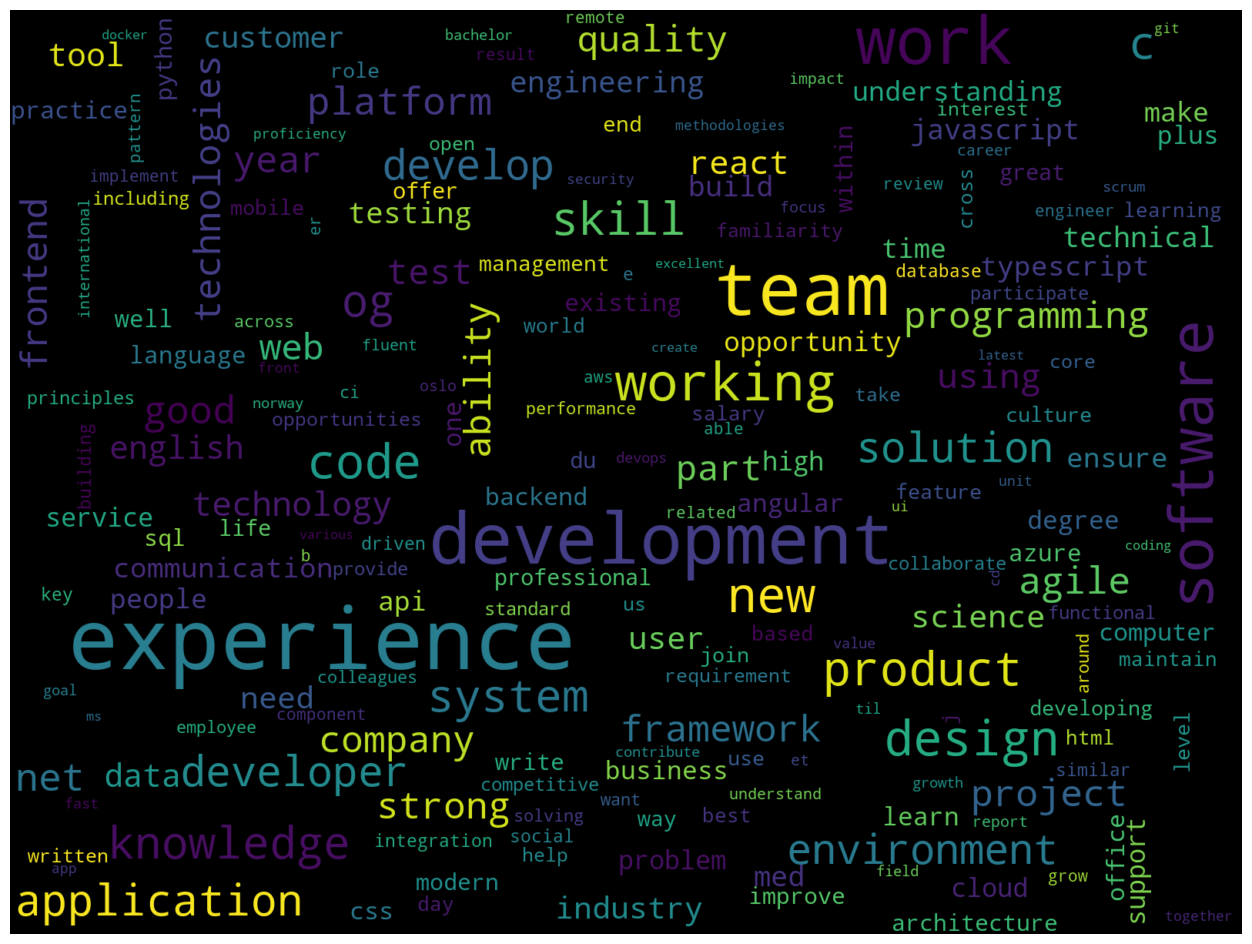

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  

def draw_cloud(column: pd.Series, stopwords=None):
    all_words = ' '.join([text for text in column]) 
    
    wordcloud = WordCloud(width=1600, height=1200, random_state=21, max_font_size=110, collocations=False, stopwords=stopwords).generate(all_words) 
    plt.figure(figsize=(16, 12)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis('off')
    plt.show()
    
    
draw_cloud(df['jobDesc_clean'])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = ["climate change . information about climate important", 
        "my cat cute . love cat"]

tfidf = TfidfVectorizer()
vectorized_docs = tfidf.fit_transform(docs).todense()

print("Shape:", vectorized_docs.shape)
display(pd.DataFrame(vectorized_docs, columns=tfidf.get_feature_names_out()))

Shape: (2, 9)


about       cat    change   climate      cute  important  information   
0  0.353553  0.000000  0.353553  0.707107  0.000000   0.353553     0.353553  \
1  0.000000  0.755929  0.000000  0.000000  0.377964   0.000000     0.000000   

       love        my  
0  0.000000  0.000000  
1  0.377964  0.377964

In [8]:
docs = df["jobDesc_clean"].values

tfidf = TfidfVectorizer()
vectorized_docs = np.asarray(tfidf.fit_transform(docs).todense())

print("Shape:", vectorized_docs.shape)

Shape: (116, 3304)


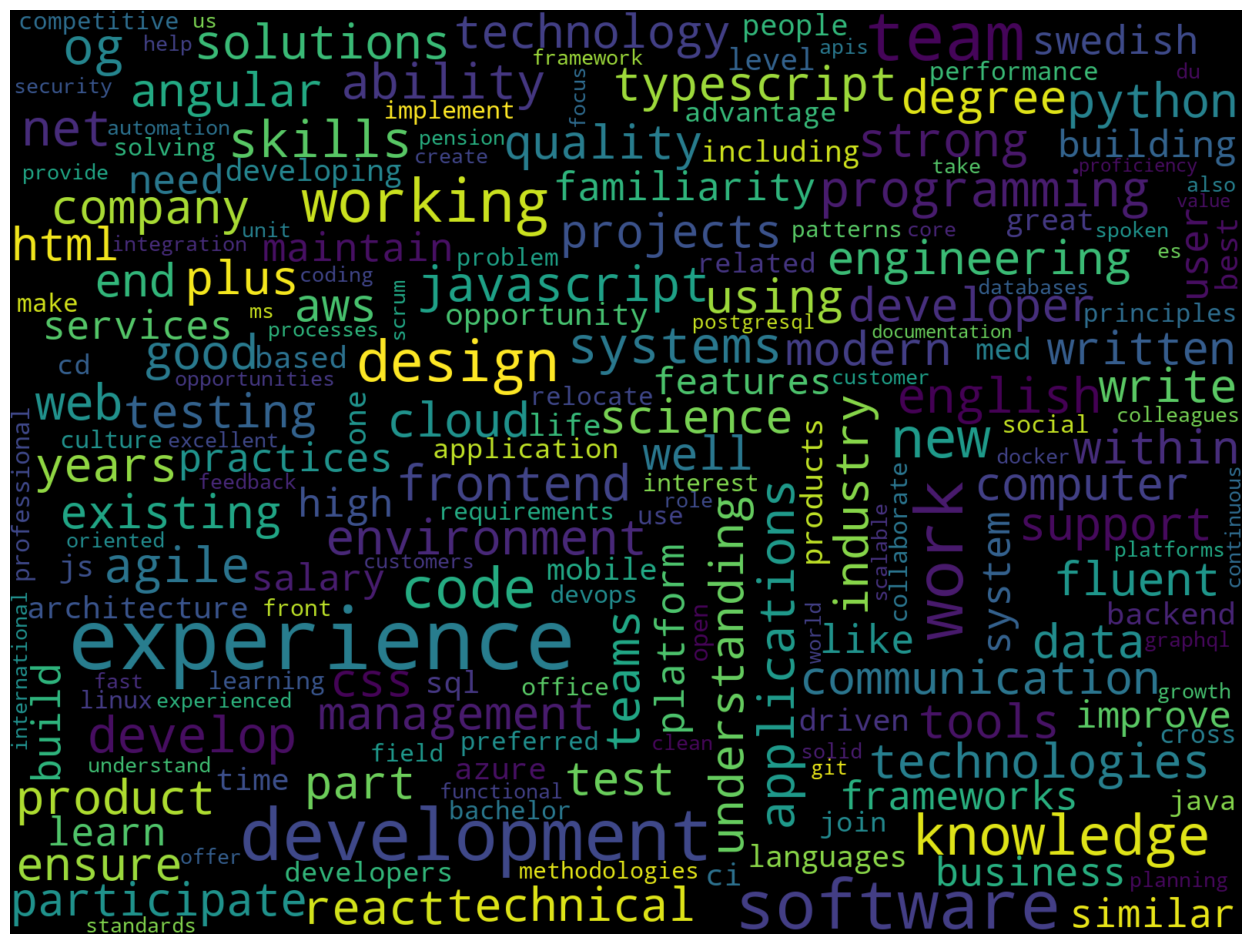

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  

df_tfidf = pd.DataFrame(vectorized_docs, columns=tfidf.get_feature_names_out())
#Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))

#wordcloud = WordCloud(width=1600, height=1200, random_state=21, max_font_size=110, collocations=False, stopwords=stopwords).generate_from_frequencies(df_tfidf.T.sum(axis=1)) 
wordcloud = WordCloud(width=1600, height=1200, random_state=21, max_font_size=110,collocations=False, stopwords=stopwords).generate_from_frequencies(df_tfidf.T.sum(axis=1))
plt.figure(figsize=(16, 12)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()
    

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk import word_tokenize


def make_clustered_dataframe(x: np.array, k: int) -> pd.DataFrame:
    """ Create a new dataframe with original docs and assigned clusters """
    #ids = np.array(df.index)
    roles = df["role"].values
    locations = df["location"].values
    docs = df["jobDesc_clean"].values
    tokenized_docs = df["jobDesc_clean"].map(text_to_tokens).values
    
    km = KMeans(n_clusters=k).fit(x)
    s_score = silhouette_score(x, km.labels_)
    print(f"K={k}: Silhouette coefficient {s_score:0.2f}, inertia:{km.inertia_}")
    
    # Create new DataFrame
    data_len = x.shape[0]
    df_clusters = pd.DataFrame({
        #"id": ids[:data_len],
        "role": roles[:data_len],
        "location": locations[:data_len],
        "desc": docs[:data_len],
        "tokens": tokenized_docs[:data_len],
        "cluster": km.labels_,
    })
    return df_clusters


def text_to_tokens(text: str) -> list[str]:
    """ Generate tokens from the sentence """
    # "this is text" => ['this', 'is' 'text']
    tokens = word_tokenize(text)  # Get tokens from text
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens


# Make clustered dataframe
k = 30
df_clusters = make_clustered_dataframe(vectorized_docs, k)
with pd.option_context('display.max_colwidth', None):
    display(df_clusters)

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=30: Silhouette coefficient 0.08, inertia:67.66822988221794


role    location   
0      Junior Software Developer- TietoEVRY    Karlstad  \
1              Software Developer .NET (C#)  Gothenburg   
2                 Junior Back-end Developer   Stockholm   
3                Android Software Developer  Gothenburg   
4                  Senior Backend Developer       Malmö   
..                                      ...         ...   
111                      Software Developer  Copenhagen   
112              Student Software developer  Copenhagen   
113           Healthcare Business Developer  Copenhagen   
114  Praktik, Software Developer, København  Copenhagen   
115               Web Site Developer Intern     Denmark   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 desc   
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from bokeh.io import show, output_notebook, export_png
from bokeh.plotting import figure, output_file
from bokeh.models import ColumnDataSource, LabelSet, Label, Whisker, FactorRange
from bokeh.transform import factor_cmap, factor_mark, cumsum
from bokeh.palettes import *
from bokeh.layouts import row, column
from bokeh.palettes import Category20
output_notebook()


def draw_clusters_tsne(docs: list, cdf: pd.DataFrame):
    """ Draw clusters using TSNE """
    cluster_labels = cdf["cluster"].values
    cluster_names = [str(c) for c in cluster_labels]
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, 
                init='pca', learning_rate='auto')
    tsne_results = tsne.fit_transform(vectorized_docs)

    # Plot output
    x, y = tsne_results[:, 0], tsne_results[:, 1]
    source = ColumnDataSource(dict(x=x, 
                                   y=y, 
                                   labels=cluster_labels,
                                   colors=cluster_names))
    palette = (RdYlBu11 + BrBG11 + Viridis11 + Plasma11 + Cividis11 + RdGy11)[:len(cluster_names)]
    
    p = figure(width=400, height=300, title="")
    p.scatter("x", "y",
              source=source, fill_alpha=0.8, size=4,
              legend_group='labels',
              color=factor_cmap('colors', palette, cluster_names)
              )
    show(p)
    

draw_clusters_tsne(vectorized_docs, df_clusters)

Loading BokehJS ...

[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.001s...
[t-SNE] Computed neighbors for 116 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 0.286900
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.471043
[t-SNE] KL divergence after 300 iterations: 0.557887


In [12]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

print("Shape:", word_vectors["software"].shape)
display(word_vectors["software"])

Shape: (300,)


array([ 0.20410156, -0.30078125, -0.01391602,  0.11914062, -0.21875   ,
        0.08740234,  0.02490234,  0.296875  ,  0.10253906,  0.03588867,
       -0.03540039, -0.15527344, -0.00390625, -0.14941406,  0.05224609,
        0.04736328,  0.18066406,  0.05810547, -0.1640625 , -0.15136719,
       -0.03808594,  0.16308594, -0.09814453,  0.11035156, -0.02319336,
        0.07958984,  0.10986328,  0.11425781, -0.01025391, -0.24609375,
       -0.08300781, -0.1171875 , -0.11279297, -0.16894531, -0.0067749 ,
       -0.16601562, -0.15039062, -0.08007812,  0.25      ,  0.0098877 ,
        0.04125977,  0.12695312,  0.21777344,  0.05297852, -0.10839844,
        0.0378418 , -0.26171875, -0.21289062, -0.04248047,  0.22949219,
        0.06640625, -0.09716797, -0.01391602, -0.33007812, -0.10986328,
        0.18457031,  0.14257812, -0.1875    ,  0.12402344,  0.06225586,
        0.13085938, -0.01116943, -0.06591797,  0.00059891, -0.34570312,
        0.16015625, -0.13867188,  0.01647949, -0.08203125, -0.03

In [13]:
from nltk import word_tokenize


def word2vec_vectorize(text: str):
    """ Convert text document to the embedding vector """    
    vectors = []
    tokens = word_tokenize(text)
    for token in tokens:
        if token in word_vectors:
            vectors.append(word_vectors[token])
            
    return np.asarray(vectors).mean(axis=0) if len(vectors) > 0 else np.zeros(word_vectors.vector_size)

In [14]:
docs = df["jobDesc_clean"].values

vectorized_docs = list(map(word2vec_vectorize, docs))
print("Shape:", np.array(vectorized_docs).shape)

# > Shape: (116, 300)

Shape: (116, 300)


In [15]:
from sklearn.cluster import KMeans

# Cluster the vectors using K-means
k = 30  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(vectorized_docs)

# Print the cluster labels
#print("Cluster labels:", cluster_labels)

# Assess cluster sizes
cluster_sizes = np.bincount(cluster_labels)
#for cluster_id, size in enumerate(cluster_sizes):
#    print(f"Cluster {cluster_id}: Size {size}")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from bokeh.io import show, output_notebook, export_png
from bokeh.plotting import figure, output_file
from bokeh.models import ColumnDataSource, LabelSet, Label, Whisker, FactorRange
from bokeh.transform import factor_cmap, factor_mark, cumsum
from bokeh.palettes import *
from bokeh.layouts import row, column
output_notebook()


cluster_names = [str(c) for c in cluster_labels]

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, 
                init='pca', learning_rate='auto')
tsne_results = tsne.fit_transform(np.array(vectorized_docs))

# Plot output
x, y = tsne_results[:, 0], tsne_results[:, 1]
source = ColumnDataSource(dict(x=x, 
                               y=y, 
                               labels=cluster_labels,
                               colors=cluster_names))
palette = (RdYlBu11 + BrBG11 + Viridis11 + Plasma11 + Cividis11 + RdGy11)[:len(cluster_names)]

p = figure(width=400, height=300, title="")
p.scatter("x", "y",
            source=source, fill_alpha=0.8, size=4,
            legend_group='labels',
            color=factor_cmap('colors', palette, cluster_names)
        )
show(p)

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Loading BokehJS ...

[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.001s...
[t-SNE] Computed neighbors for 116 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 0.244733
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.857578
[t-SNE] KL divergence after 300 iterations: 0.422924


In [16]:
from sentence_transformers import SentenceTransformer

docs = ['the influence of human activity on the warming of the climate system has evolved from theory to established fact', 
        'cats can jump 5 times their own height']

model = SentenceTransformer('all-MiniLM-L6-v2')
vectorized_docs = model.encode(np.asarray(docs))

print("Shape:", vectorized_docs.shape)
# > Shape: (2, 384)

/usr/local/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape: (2, 384)


In [17]:
def partial_clean(s_text: str) -> str:
    """ Convert description to a plain text sentence """
    output = re.sub("[^a-zA-Z]+", " ", s_text)  # Filter
    output = re.sub(r"\s+", " ", output)  # Remove multiple spaces
    output = output.strip('\'"')  # Remove leading and trailing ' or "
    return output

docs = df['jobDesc'].map(partial_clean).values
vectorized_docs = model.encode(np.asarray(docs))
print("Shape:", vectorized_docs.shape)

# > Shape: (116, 384)

Shape: (116, 384)


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def make_clustered_dataframe(x: np.array, k: int) -> pd.DataFrame:
    """ Create a new dataframe with original docs and assigned clusters """
    #ids = np.array(df.index)
    roles = df["role"].values
    locations = df["location"].values
    docs = df["jobDesc_clean"].values
    tokenized_docs = df["jobDesc_clean"].map(text_to_tokens).values
    
    km = KMeans(n_clusters=k).fit(x)
    s_score = silhouette_score(x, km.labels_)
    print(f"K={k}: Silhouette coefficient {s_score:0.2f}, inertia:{km.inertia_}")
    
    # Create new DataFrame
    data_len = x.shape[0]
    df_clusters = pd.DataFrame({
        #"id": ids[:data_len],
        "role": roles[:data_len],
        "location": locations[:data_len],
        "desc": docs[:data_len],
        "tokens": tokenized_docs[:data_len],
        "cluster": km.labels_,
    })
    return df_clusters


def text_to_tokens(text: str) -> list[str]:
    """ Generate tokens from the sentence """
    # "this is text" => ['this', 'is' 'text']
    tokens = word_tokenize(text)  # Get tokens from text
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens


# Make clustered dataframe
k = 30
df_clusters = make_clustered_dataframe(vectorized_docs, k)
with pd.option_context('display.max_colwidth', None):
    display(df_clusters)

K=30: Silhouette coefficient 0.09, inertia:36.82315444946289


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


role    location   
0      Junior Software Developer- TietoEVRY    Karlstad  \
1              Software Developer .NET (C#)  Gothenburg   
2                 Junior Back-end Developer   Stockholm   
3                Android Software Developer  Gothenburg   
4                  Senior Backend Developer       Malmö   
..                                      ...         ...   
111                      Software Developer  Copenhagen   
112              Student Software developer  Copenhagen   
113           Healthcare Business Developer  Copenhagen   
114  Praktik, Software Developer, København  Copenhagen   
115               Web Site Developer Intern     Denmark   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 desc   
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Cluster 27: Size:2, avg:1.00, min:1.00, max: 1.00
Cluster 1: Size:2, avg:0.71, min:0.70, max: 0.71
Cluster 14: Size:2, avg:0.60, min:0.59, max: 0.60
Cluster 20: Size:3, avg:0.44, min:0.42, max: 0.46
Cluster 7: Size:3, avg:0.35, min:0.05, max: 0.51
Cluster 12: Size:2, avg:0.27, min:0.24, max: 0.30
Cluster 24: Size:3, avg:0.25, min:0.05, max: 0.36
Cluster 0: Size:3, avg:0.12, min:0.08, max: 0.16
Cluster 23: Size:3, avg:0.11, min:0.05, max: 0.17
Cluster 25: Size:2, avg:0.11, min:0.09, max: 0.12
Cluster 21: Size:4, avg:0.10, min:-0.00, max: 0.18
Cluster 13: Size:9, avg:0.07, min:-0.01, max: 0.16
Cluster 26: Size:2, avg:0.06, min:0.04, max: 0.07
Cluster 5: Size:3, avg:0.04, min:0.04, max: 0.05
Cluster 28: Size:3, avg:0.04, min:-0.00, max: 0.06
Cluster 29: Size:5, avg:0.03, min:-0.03, max: 0.07
Cluster 10: Size:6, avg:0.02, min:-0.05, max: 0.08
Cluster 4: Size:4, avg:0.01, min:-0.03, max: 0.08
Cluster 6: Size:4, avg:0.01, min:-0.10, max: 0.09
Cluster 2: Size:5, avg:0.00, min:-0.04, max: 0.04

role location   
46  Medium Golang Developer     Oslo  \
48  Senior Golang Developer     Oslo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              desc   
46  design implement software solutions support bank operations processes maintain improve existing systems contribute development new products features collaborate cross functional teams understand business requirements translate technical solutions write clean scalable maintainable code participate code reviews provide constructive feedback team members troubleshoot debug issues arise bachelor degree computer science related field years experience software development focus go programming experience working core banking technology familiarity crypto web plus strong problem solving skills ability think critically excellent communication skills ability work well team environment ability work effectively fast paced dynamic environment competitive salary remote work meld tokens  \
48  design implement software solutions support bank operations processes maintain improve existing systems contribute development new products features collaborate cross functional teams understand business requirements translate technical solutions write clean scalable maintainable code participate code reviews provide constructive feedback team members troubleshoot debug issues arise bachelor degree computer science related field years experience software development focus go programming experience working core banking technology familiarity crypto web plus strong problem solving skills ability think critically excellent communication skills ability work well team environment ability work effectively fast paced dynamic environment competitive salary remote work meld tokens   

    cluster  
46       27  
48       27

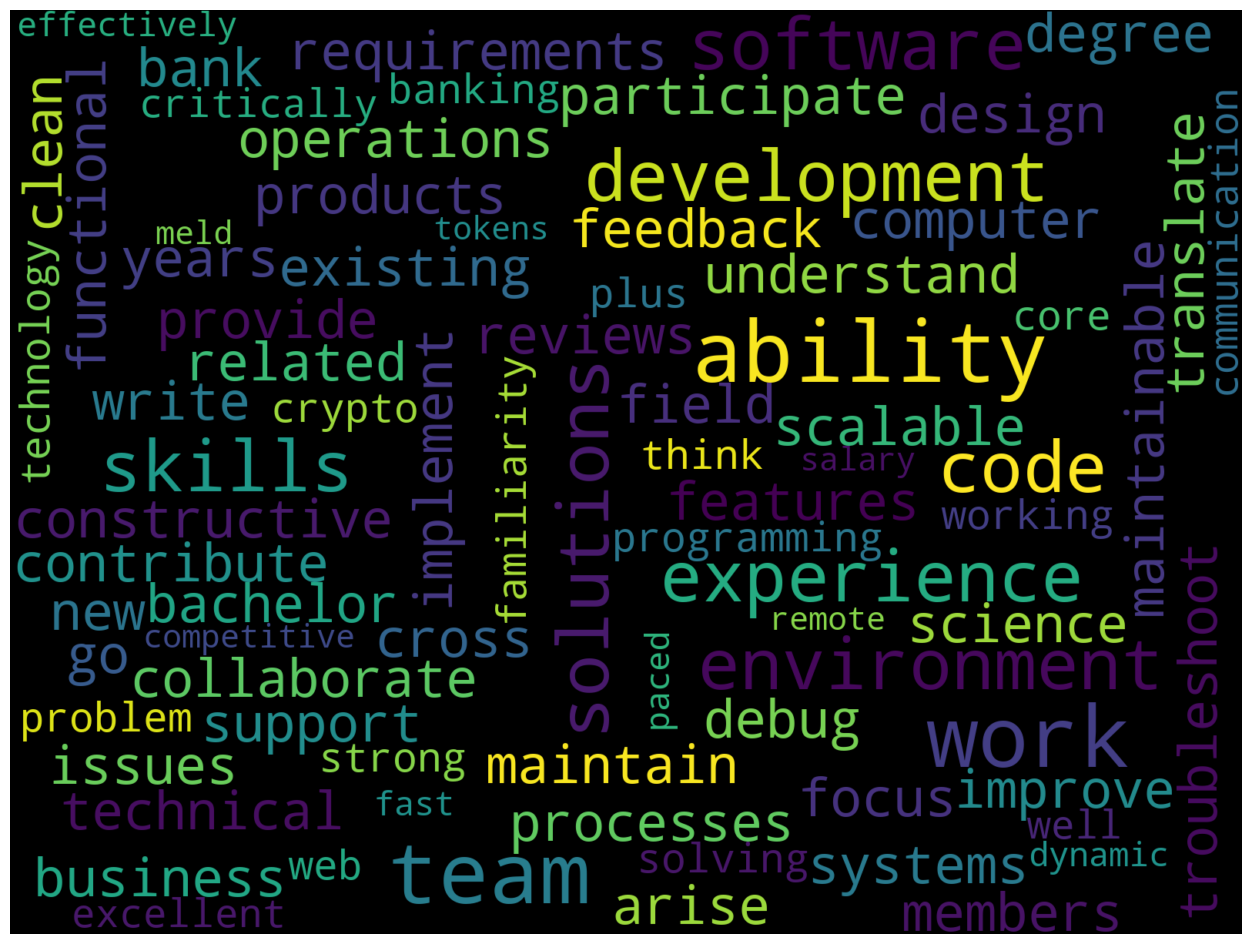

[('ability', 6),
 ('work', 6),
 ('software', 4),
 ('solutions', 4),
 ('development', 4),
 ('code', 4),
 ('team', 4),
 ('experience', 4),
 ('skills', 4),
 ('environment', 4)]

role location   
51  Python Software Developer     Oslo  \
56     C++ Software Developer     Oslo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc   
51                                                                                                                                                                                                     delivering customized solutions energy management process optimizes sales renewable power spot reserve markets working construction maintenance teams build operate power plants using machine learning optimize maintenance work many analysis teams help develop tooling automating time consuming manual processes developing high performance computing platform run computationally heavy models tooling around platform work part high performance computing team develops platform computationally heavy models run tooling around structure input data result sets perform advanced analytics model results make available rest business work together business users develop advanced algorithms solves complex business problems help shaping statkraft digital future big data machine learning predictive analytics etc years software development experience experience python knowledgeable c good social communication skills eager learn new trends technologies fluent english preferrably norwegian proactive responsible team player enjoys challenging time series oriented databases ci cd pipeline establishment containerization kubernetes net experience good understanding mathematics statistics experience agile methodology scrum unlimited learning opportunities various levels organisation chance grow career alongside truly global network experts leaders specialists graduates different countries backgrounds work culture puts emphasis individual offering flexible working solutions parental leave work life balance principles statkraft offers competitive terms employment benefits schemes trusted employer puts safety people first believe safe healthy working environment matter choice chance relocation support needed  \
56  delivering customized solutions energy management process optimizes sales re

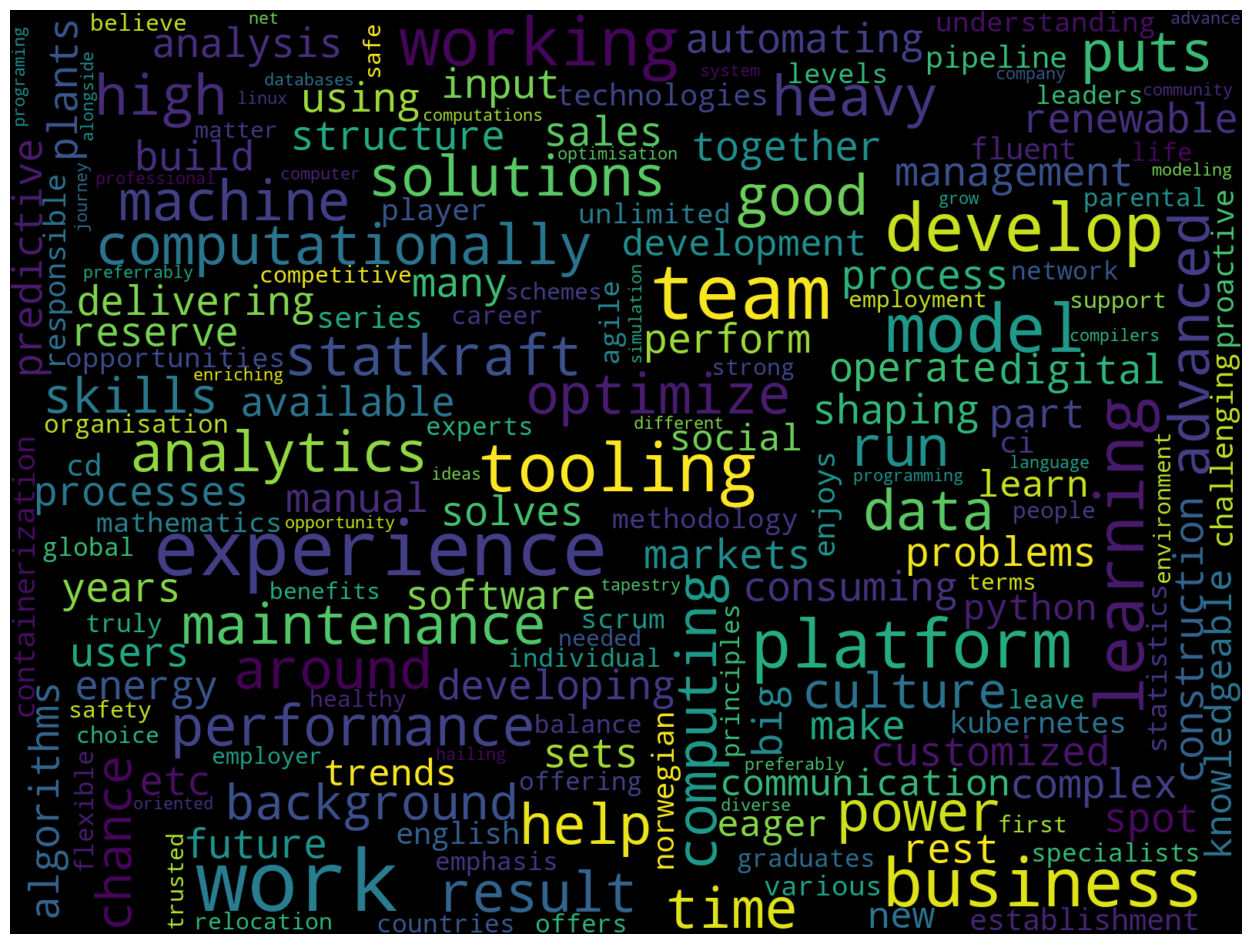

[('work', 10),
 ('experience', 8),
 ('working', 6),
 ('learning', 6),
 ('tooling', 6),
 ('platform', 6),
 ('business', 6),
 ('solutions', 4),
 ('power', 4),
 ('maintenance', 4)]

role location   
22  Software Developer     Lund  \
80  Software Developer  Kjeller   

                                                                                                                                                                                                                                                                                                                                   desc   
22  c c vb net c advantageous working databases sql oracle postgresql business critical environment advantageous good written oral knowledge swedish english mandatory experience warehouse logistics wms wcs automation equipment erp systems advantage experience modern version management systems case management systems advantage  \
80  c c vb net c meritorious working databases sql oracle postgresql business critical environment meritorious good written oral knowledge norwegian english mandatory experience warehouse logistics wms wcs automation equipment erp systems advantage experience modern version management systems case management systems advantage   

    cluster  
22       14  
80       14

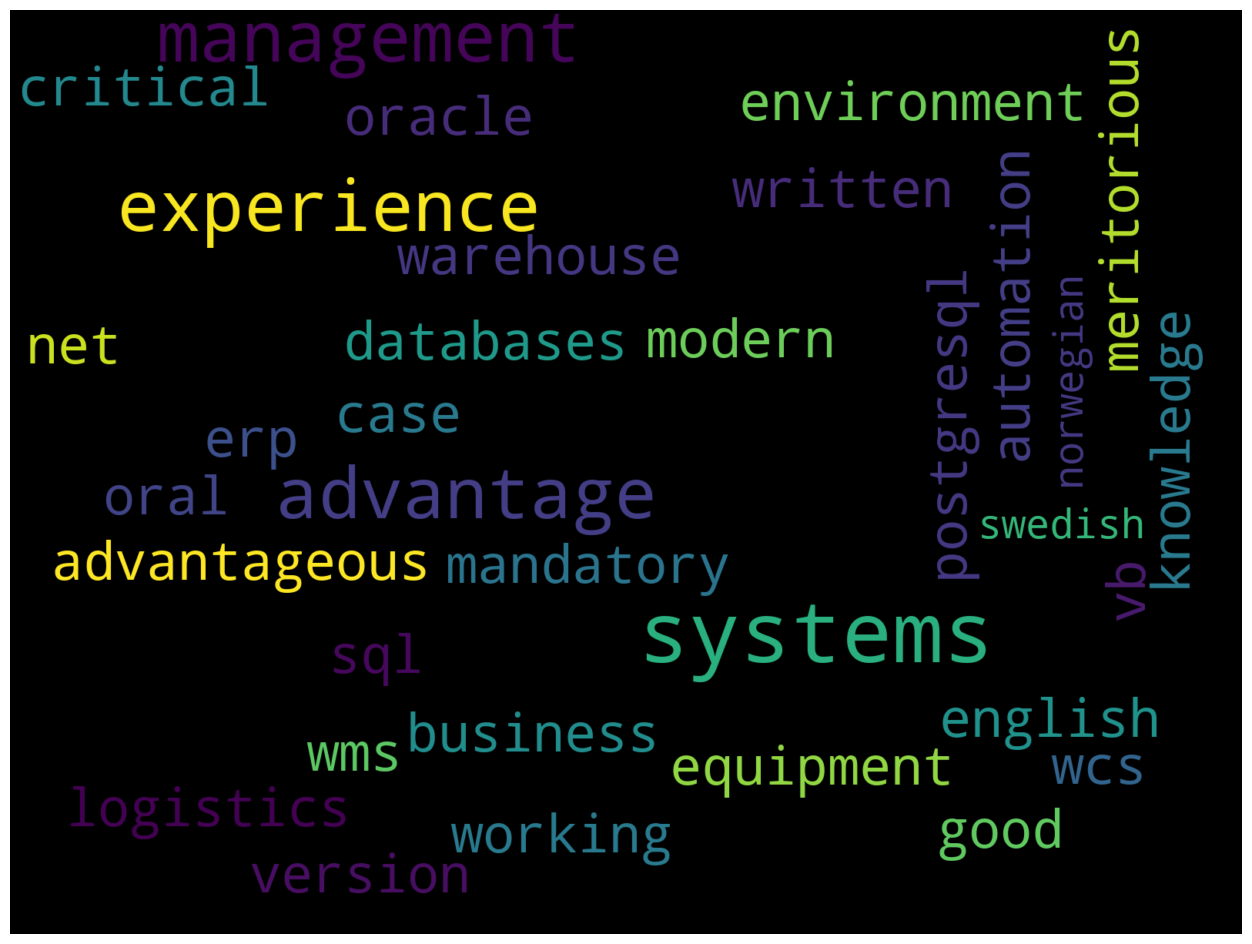

[('systems', 6),
 ('experience', 4),
 ('advantage', 4),
 ('management', 4),
 ('vb', 2),
 ('net', 2),
 ('advantageous', 2),
 ('working', 2),
 ('databases', 2),
 ('sql', 2)]

role    location   
10                Software Developer – Lulea       Luleå  \
21  Embedded Software Developer - Gothenburg  Gothenburg   
29           Software Developer – Gothenburg  Gothenburg   

                                                                                                                                                                                    desc   
10    v ster reliably commute planning relocate starting work preferred salary expectations available join need sponsor swedish working permit level proficient swedish sweden preferred  \
21  g teborg reliably commute planning relocate starting work preferred salary expectations available join need sponsor swedish working permit level proficient swedish sweden preferred   
29                      stockholm reliably commute planning relocate starting work required need sponsor work sweden salary expectations available join swedish required sweden required   

    cluster  
10       20  
21       20  
29       20

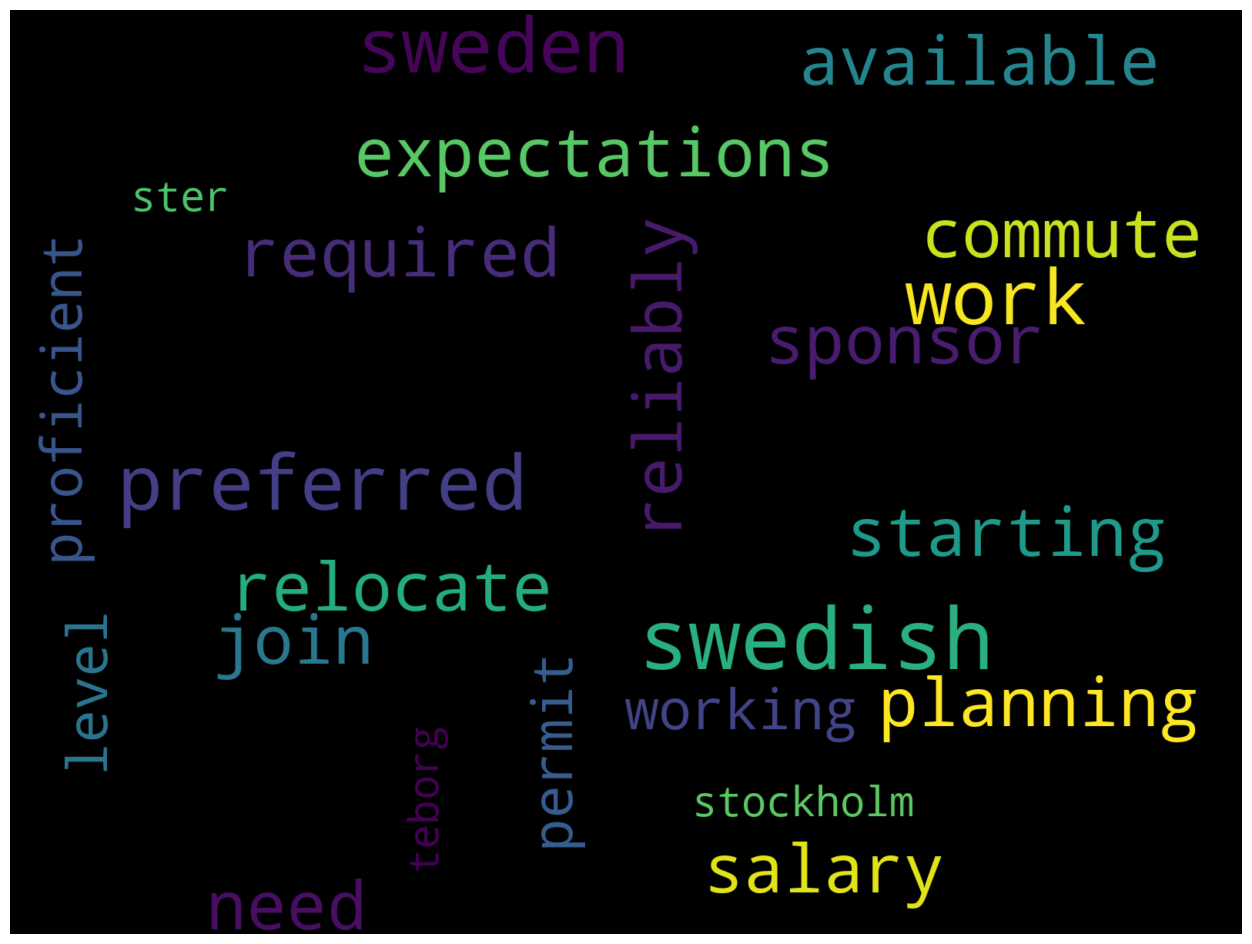

[('swedish', 5),
 ('work', 4),
 ('preferred', 4),
 ('sweden', 4),
 ('reliably', 3),
 ('commute', 3),
 ('planning', 3),
 ('relocate', 3),
 ('starting', 3),
 ('salary', 3)]

role   location   
9     Frontend Developer  Stockholm  \
11     Backend Developer  Stockholm   
63  Full-stack Developer       Oslo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  desc   
9                                                                                                                                                website front sales journey guide customer process receiving first solution estimate way installed product home solution design installations build tools needed find optimal energy solution smooth installation senior team everyone lot experience bring table cross functional team setup developers work closely designers product people open mindset trust make decisions try new ways working sometimes get right sometimes agree might brightest idea team lunch least week daily coffee train lobby get nicer coffee changing organisation need smart around organise team also infrastructure comes code design need open change things evolve always scaling mind like include whole team kinds discussions gather input experiences everyone team international market meaning unique needs regulations need follow every country active team key player provides technical platforms selling products collaborate teams across whole company finding new lunch spots fit growing team solid experience product driven software development agile environments experience react typescript experience automated testing rapid growth journeys start ups scale ups new environments next js cms integration seo experience component libraries entrepreneurial confident open minded initiative taking team player motivator excellent communicator competitive salary rewarding secondary benefits chance build global company transformative products fast moving growth journey making positive impact world supportive inclusive culture alive learning opportunities  \
11  website front sales journey guide customer process receiving first solution estimate way installed product home solution design installations build tools needed find optimal energy solution smooth installation senior team everyone lot experience bring table cross functional team setup developers work closely designers product people open mindset trust make decisions try new ways working sometimes get right sometimes agree might brightest idea team lunch least week daily coffee train lobby get nicer coffee 

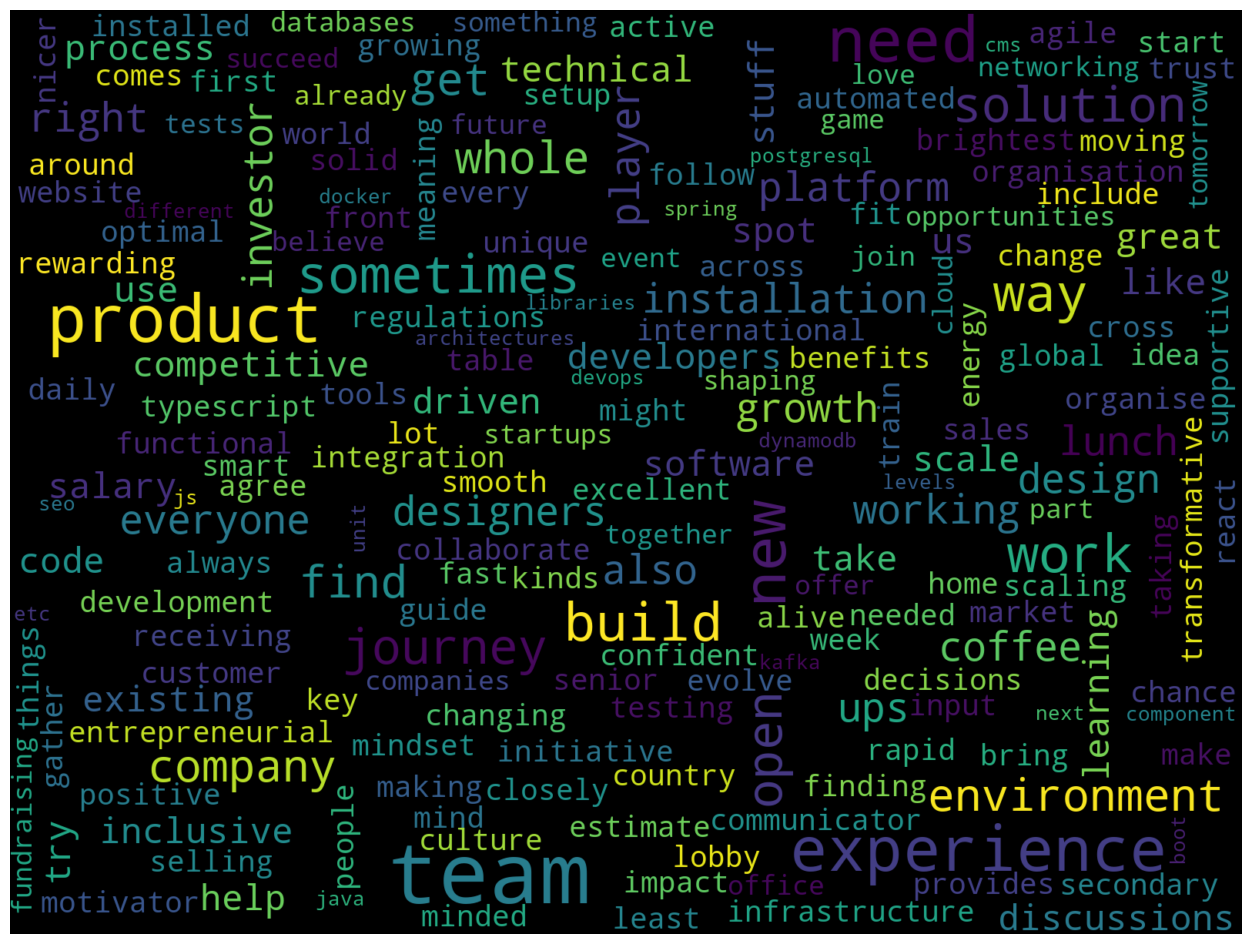

[('team', 18),
 ('new', 9),
 ('experience', 8),
 ('need', 8),
 ('product', 7),
 ('build', 7),
 ('work', 7),
 ('sometimes', 7),
 ('solution', 6),
 ('open', 6)]

role    location   
32  Software Developer - Employee Experience Team  Gothenburg  \
41         Software Developer - Transformers Team  Gothenburg   

                                                                                                                                                                                                                                                                                                                                                                                                                   desc   
32                                angular typescript sass java spring framework collective agreement generous wellness allowance days vacation itp pension lifeplan pension tool provides personalized advice optimize retirement planning guaranteed work life balance hybrid work model annual conference abroad variety social events activities offices responsible development offer internal career opportunities  \
41  java angular mysql spring jpa hibernate intellij gitlab jenkins docker nats collective agreement generous wellness allowance days vacation itp pension lifeplan pension tool provides personalized advice optimize retirement planning guaranteed work life balance hybrid work model annual conference abroad variety social events activities offices responsible development offer internal career opportunities   

    cluster  
32       12  
41       12

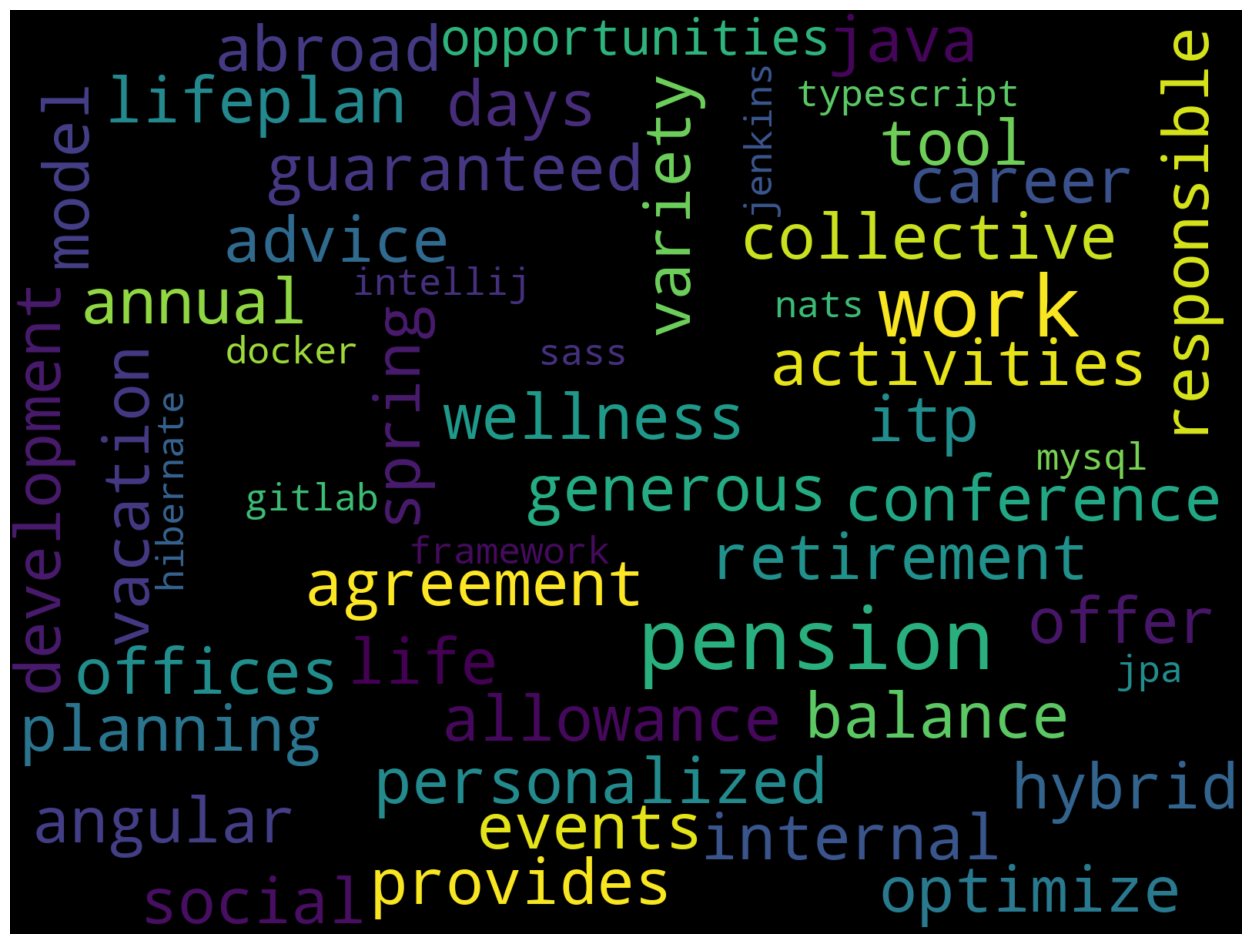

[('pension', 4),
 ('work', 4),
 ('angular', 2),
 ('java', 2),
 ('spring', 2),
 ('collective', 2),
 ('agreement', 2),
 ('generous', 2),
 ('wellness', 2),
 ('allowance', 2)]

role  location   
19           Junior Backend Engineer  Danderyd  \
74  Software Developer - Hybrid Role     Viken   
86      Software Developer Team Lead   Lysaker   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               desc   
19  join neko health junior backend engineer make difference health tech industry looking imaginative talented individual eager help us develop operate secure world scale performant health data platform neko health neko health swedish health tech company co founded hjalmar nilsonne danie

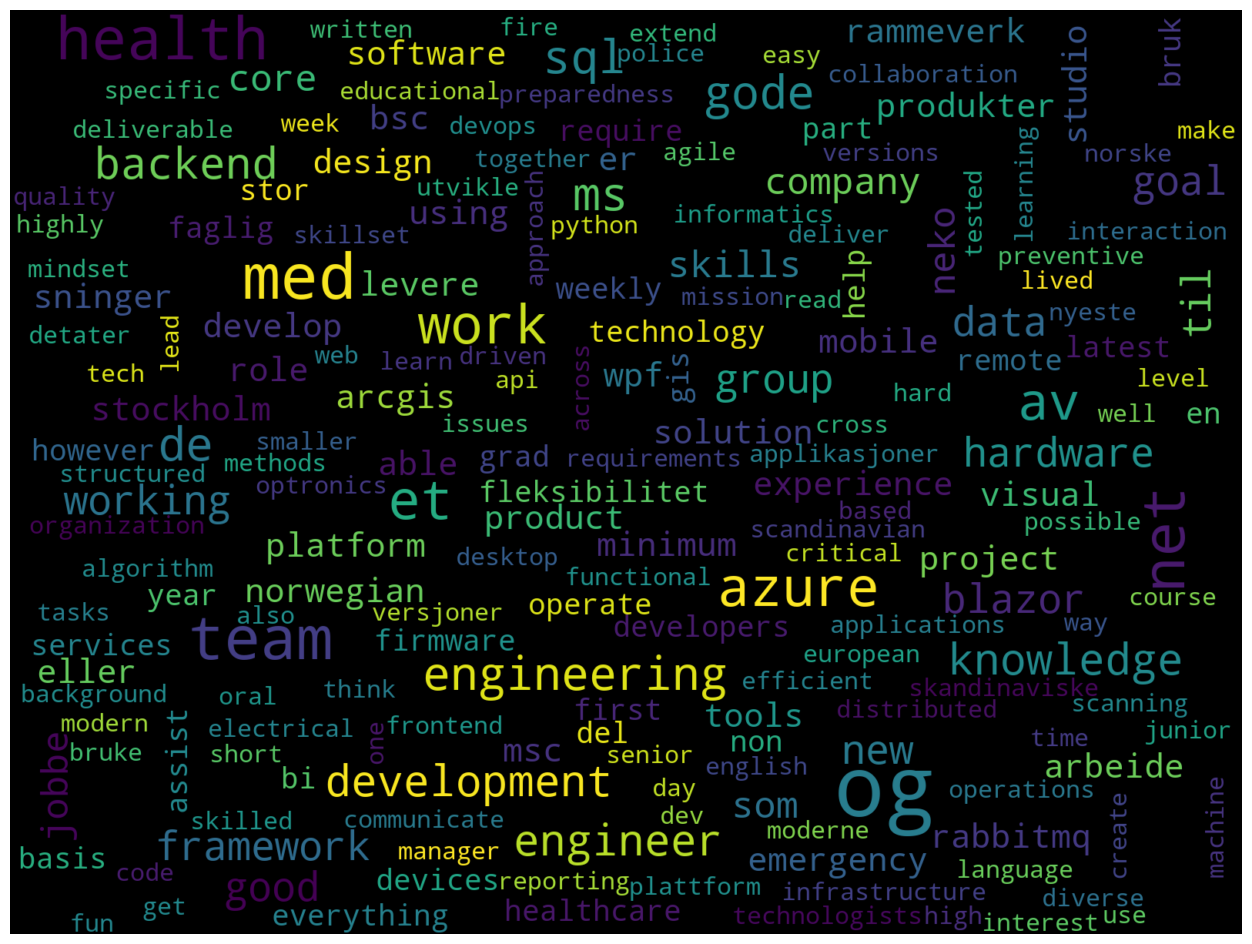

[('og', 30),
 ('med', 15),
 ('health', 13),
 ('net', 13),
 ('work', 11),
 ('azure', 11),
 ('et', 11),
 ('team', 10),
 ('av', 10),
 ('engineering', 8)]

In [19]:
from sklearn.metrics import silhouette_samples
from collections import Counter

def show_clusters_info(x: np.array, k: int, cdf: pd.DataFrame):
    """ Print clusters info and top clusters """
    labels = cdf["cluster"].values
    sample_silhouette_values = silhouette_samples(x, labels)
    
    # Get silhouette values per cluster    
    silhouette_values = []
    for i in range(k):
        cluster_values = sample_silhouette_values[labels == i]
        silhouette_values.append((i, 
                                  cluster_values.shape[0], 
                                  cluster_values.mean(), 
                                  cluster_values.min(), 
                                  cluster_values.max()))
    # Sort
    silhouette_values = sorted(silhouette_values, 
                               key=lambda tup: tup[2], 
                               reverse=True)
    
    # Show clusters, sorted by silhouette values
    for s in silhouette_values:
        print(f"Cluster {s[0]}: Size:{s[1]}, avg:{s[2]:.2f}, min:{s[3]:.2f}, max: {s[4]:.2f}")

    # Show top 7 clusters
    top_clusters = []
    for cl in silhouette_values[:7]:
        df_c = cdf[cdf['cluster'] == cl[0]]

        # Show cluster
        with pd.option_context('display.max_colwidth', None):
            display(df_c[["role","location","desc", "cluster"]])
            
        # Show words cloud
        s_all = ""
        for tokens_list in df_c['tokens'].values:
            s_all += ' '.join([text for text in tokens_list]) + " "            
        draw_cloud_from_words(s_all, stopwords=["url"])
        
        # Show most popular words
        vocab = Counter()
        for token in df_c["tokens"].values:
            vocab.update(token)
        display(vocab.most_common(10))


def draw_cloud_from_words(all_words: str, stopwords=None):
    """ Show the word cloud from the list of words """
    wordcloud = WordCloud(width=1600, height=1200, random_state=21, max_font_size=110, collocations=False, stopwords=stopwords).generate(all_words) 
    plt.figure(figsize=(16, 12)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis('off')
    plt.show()


show_clusters_info(vectorized_docs, k, df_clusters)

Processing: 2
Processing: 4
Processing: 6
Processing: 8
Processing: 10
Processing: 12


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/pyt

Processing: 14
Processing: 16
Processing: 18


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 20
Processing: 22
Processing: 24


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 26
Processing: 28
Processing: 30


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 32
Processing: 34


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 36
Processing: 38


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 40
Processing: 42


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 44


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 46


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Processing: 48


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


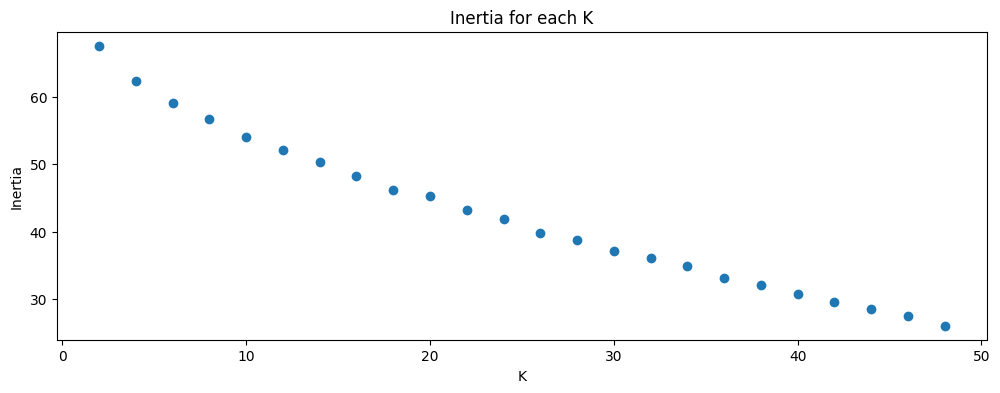

In [20]:
import matplotlib.pyplot as plt  
%matplotlib inline


def graw_elbow_graph(x: np.array, k1: int, k2: int, k3: int):
    k_values, inertia_values = [], []
    for k in range(k1, k2, k3):
        print("Processing:", k)
        km = KMeans(n_clusters=k).fit(x)
        k_values.append(k)
        inertia_values.append(km.inertia_)

    plt.figure(figsize=(12,4))
    plt.plot(k_values, inertia_values, 'o')
    plt.title('Inertia for each K')
    plt.xlabel('K')
    plt.ylabel('Inertia')


graw_elbow_graph(vectorized_docs, 2, 50, 2)

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from bokeh.io import show, output_notebook, export_png
from bokeh.plotting import figure, output_file
from bokeh.models import ColumnDataSource, LabelSet, Label, Whisker, FactorRange
from bokeh.transform import factor_cmap, factor_mark, cumsum
from bokeh.palettes import *
from bokeh.layouts import row, column
output_notebook()


def draw_clusters_tsne(docs: list, cdf: pd.DataFrame):
    """ Draw clusters using TSNE """
    cluster_labels = cdf["cluster"].values
    cluster_names = [str(c) for c in cluster_labels]
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, 
                init='pca', learning_rate='auto')
    tsne_results = tsne.fit_transform(vectorized_docs)

    # Plot output
    x, y = tsne_results[:, 0], tsne_results[:, 1]
    source = ColumnDataSource(dict(x=x, 
                                   y=y, 
                                   labels=cluster_labels,
                                   colors=cluster_names))
    palette = (RdYlBu11 + BrBG11 + Viridis11 + Plasma11 + Cividis11 + RdGy11)[:len(cluster_names)]

    p = figure(width=400, height=300, title="")
    p.scatter("x", "y",
              source=source, fill_alpha=0.8, size=4,
              legend_group='labels',
              color=factor_cmap('colors', palette, cluster_names)
              )
    show(p)
    

draw_clusters_tsne(vectorized_docs, df_clusters)

Loading BokehJS ...

[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.000s...
[t-SNE] Computed neighbors for 116 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 0.390229
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.002533
[t-SNE] KL divergence after 300 iterations: 0.503484
